In [7]:
import re, sys
print("{:15s} {}".format("python", re.sub(r' \|(\n|.)*', '', sys.version)))
import IPython
print("{:15s} {}".format("IPython", IPython.__version__))
import matplotlib
print("{:15s} {}".format("matplotlib", matplotlib.__version__))
import networkx
print("{:15s} {}".format("networkx", networkx.__version__))
import nltk
print("{:15s} {}".format("nltk", nltk.__version__))
import numpy
print("{:15s} {}".format("numpy", numpy.__version__))
import pandas
print("{:15s} {}".format("pandas", pandas.__version__))
import pickle
print("{:15s} {}".format("pickle", pickle.format_version))
import scipy
print("{:15s} {}".format("scipy", scipy.__version__))
import seaborn
print("{:15s} {}".format("seaborn", seaborn.__version__))
import sklearn
print("{:15s} {}".format("sklearn", sklearn.__version__))
import jupyter_core
print("{:15s} {}".format("jupyter_core", jupyter_core.__version__))
import jupyter_client
print("{:15s} {}".format("jupyter_client", jupyter_client.__version__))
import notebook
print("{:15s} {}".format("notebook", notebook.__version__))
import jupyterlab
print("{:15s} {}".format("jupyterlab", jupyterlab.__version__))

python          3.6.2
IPython         6.1.0
matplotlib      2.0.2
networkx        1.11
nltk            3.3
numpy           1.13.1
pandas          0.20.3
pickle          4.0
scipy           0.19.1
seaborn         0.7.1
sklearn         0.18.2
jupyter_core    4.3.0
jupyter_client  5.1.0
notebook        5.0.0
jupyterlab      0.27.0


---

_You are currently looking at **version 1.1** of this notebook. To download notebooks and datafiles, as well as get help on Jupyter notebooks in the Coursera platform, visit the [Jupyter Notebook FAQ](https://www.coursera.org/learn/python-social-network-analysis/resources/yPcBs) course resource._

---

# Assignment 1 - Creating and Manipulating Graphs

Eight employees at a small company were asked to choose 3 movies that they would most enjoy watching for the upcoming company movie night. These choices are stored in the file `Employee_Movie_Choices.txt`.

A second file, `Employee_Relationships.txt`, has data on the relationships between different coworkers. 

The relationship score has value of `-100` (Enemies) to `+100` (Best Friends). A value of zero means the two employees haven't interacted or are indifferent.

Both files are tab delimited.

In [14]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite


# This is the set of employees
employees = set(['Pablo',
                 'Lee',
                 'Georgia',
                 'Vincent',
                 'Andy',
                 'Frida',
                 'Joan',
                 'Claude'])

# This is the set of movies
movies = set(['The Shawshank Redemption',
              'Forrest Gump',
              'The Matrix',
              'Anaconda',
              'The Social Network',
              'The Godfather',
              'Monty Python and the Holy Grail',
              'Snakes on a Plane',
              'Kung Fu Panda',
              'The Dark Knight',
              'Mean Girls'])


# you can use the following function to plot graphs
# make sure to comment it out before submitting to the autograder
def plot_graph(G, weight_name=None):
    '''
    G: a networkx G
    weight_name: name of the attribute for plotting edge weights (if G is weighted)
    '''
    %matplotlib inline
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12,10))
    pos = nx.spring_layout(G)
    edges = G.edges()
    weights = None
    
    if weight_name:
        weights = [int(G[u][v][weight_name]) for u,v in edges]
        labels = nx.get_edge_attributes(G,weight_name)
        nx.draw_networkx_edge_labels(G,pos,edge_labels=labels)
        nx.draw_networkx(G, pos, edges=edges, width=weights);
    else:
        nx.draw_networkx(G, pos, edges=edges);

### Question 1

Using NetworkX, load in the bipartite graph from `Employee_Movie_Choices.txt` and return that graph.

*This function should return a networkx graph with 19 nodes and 24 edges*

In [15]:
def answer_one():
        
    # Your Code Here
    data = pd.read_csv('Employee_Movie_Choices.txt', header = None)
    b = data[0].apply(lambda x: x.split('\t'))
    employee =[]
    movie =[]
    em_mo =[]
    for i in range(1, len(data)):
        if b[i][0] not in employee:
            employee.append(b[i][0])
        if  b[i][1] not in movie:
            movie.append(b[i][1])
        em_mo.append(b[i])

    B = nx.Graph() 
    B.add_nodes_from(employee, bipartite=0) 
    B.add_nodes_from(movie, bipartite=1) 
    B.add_edges_from(em_mo)
    pos = {}
    pos.update((node, (1, index)) for index, node in enumerate(employee))
    pos.update((node, (2, index)) for index, node in enumerate(movie))
    
    return B

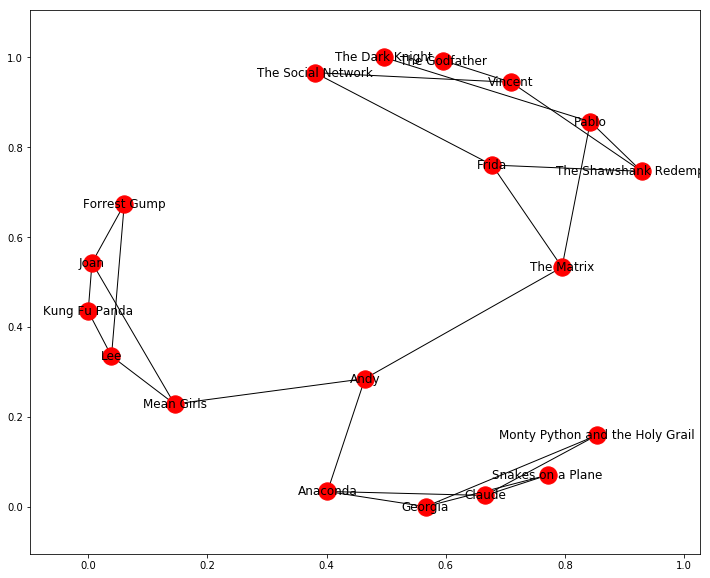

In [16]:
B = answer_one()
plot_graph(B, weight_name=None)

### Question 2

Using the graph from the previous question, add nodes attributes named `'type'` where movies have the value `'movie'` and employees have the value `'employee'` and return that graph.

*This function should return a networkx graph with node attributes `{'type': 'movie'}` or `{'type': 'employee'}`*

In [7]:
def answer_two():
    B = answer_one()
    for i in employees:
        B.nodes[i]['type']= 'employee'
    for i in movies:
        B.nodes[i]['type']= 'movie'
            
    return B

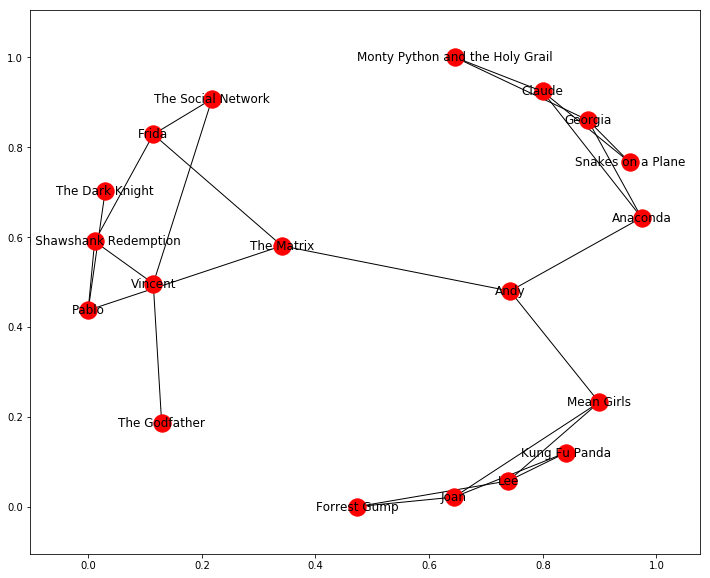

In [17]:
B2 = answer_one()
plot_graph(B2, weight_name=None)

### Question 3

Find a weighted projection of the graph from `answer_two` which tells us how many movies different pairs of employees have in common.

*This function should return a weighted projected graph.*

In [18]:
def answer_three():
    B = answer_one()    
    # Your Code Here
    weighted_proj_B = bipartite.weighted_projected_graph(B, employees)
    return weighted_proj_B

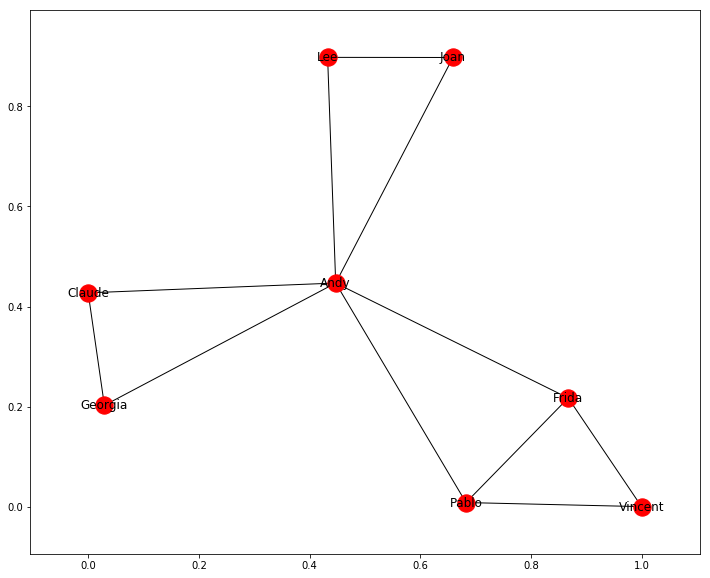

In [19]:
weighted_proj_B = answer_three()
plot_graph(weighted_proj_B, weight_name=None)

### Question 4

Suppose you'd like to find out if people that have a high relationship score also like the same types of movies.

Find the Pearson correlation ( using `DataFrame.corr()` ) between employee relationship scores and the number of movies they have in common. If two employees have no movies in common it should be treated as a 0, not a missing value, and should be included in the correlation calculation.

*This function should return a float.*

In [12]:
def answer_four():
    P = answer_three()     
    mo_df = pd.DataFrame(P.edges(data=True), columns = [0, 1,'mo'])
    mo_df['mo']= mo_df['mo'].apply(lambda x: x['weight'] )
    mo_df2 = mo_df[[1, 0, 'mo']]
    mo_df2.columns = [0,1,'mo']
    mo_df3 = pd.concat([mo_df, mo_df2])
    re_df = pd.read_csv('Employee_Relationships.txt' , delimiter="\t",header=None, names= [0,1, "Relations"])
    merge_df = re_df.merge(mo_df3, on= [0,1], how='left').fillna(0)
    
    return     merge_df.corr()['Relations'][1]

In [13]:
answer_four()

0.78839622217334759